<a href="https://colab.research.google.com/github/SrMouraSilva/Introducao-a-Modelagem/blob/main/3_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math

# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

In [ ]:
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 3.10
 
Reconsider the newspaper problem of Exercise 7 in Chapter 2, but now suppose that we choose to maximize our profit margin (profit as a percentage of revenue. Assume that our business expenses remain fixed at $\$200{,}000$ per week.
 
Relembrando o exercício 2.7,
> **Exercice 2.7** A local daily newspaper has recently been acquired by a large media conglomerate. The paper currently sells for $\$1.50$/week and has a circulation of $80{,}000$ subscribers. Advertising sells for $\$250$/page, and the paper currently sells 350 pages/week (50 pages/day). The new management is looking for ways to increase profits. It is estimated that an increase of ten cents/week in the subscription price will cause a drop in circulation of 5,000 subscribers. Increasing the price of advertising by $\$100$/page will cause the paper to lose approximately 50 pages of advertising per week. The loss of advertising will also affect circulation, since one of the reasons people buy the paper is for the advertisements. It is estimated that a loss of 50 pages of advertisements per week will reduce circulation by 1,000 subscriptions.
 
 
**AVISO:** Dado que o item a) é baseado em um método aleatório, atente-se que a execução do código novamente gerará valores diferentes. No decorrer da questão, as comparações entre valores foram feitas via código.

### a) Find the subscription price and the advertising price that maximize profit margin. Use the five-step method, and model as an unconstrained optimization problem. Find an approximate solution by the method of random search.

#### Passo 1 - Variáveis
 
* $a$ = preço de uma assinatura (USD/semana)
* $p$ = preço da publicidade (USD/página)
* $p_{\text{original}}$ = preço da publicidade original sem ter aplicado qualquer mudança (USD/página)
* $n_{\text{assinantes}}$ = número de assinantes (assinantes)
* $n_{\text{publicidade}}$ = número de páginas de publicidade vendidas na semana (páginas/semana)
* $C$ = custo da produção dos jornais (USD/semana) = USD $200{,}000$ (valor fixo)
* $R$ = receita da venda dos jornais (USD/semana)
* $L$ = lucro da venda dos jornais (USD/semana)

#### Passo 1 - Suposições do problema

In [ ]:
a = var('a', real=True)
p = var('p', real=True)
 
p_original = 250
n_publicidade_original = 350
n_p = n_publicidade_original - 50*(p - p_original)/100
 
a_original = 1.5
n_a = 80_000 - 5_000*(a - a_original)/0.1 - 1000*(n_publicidade_original - n_p)/50
 
R = p*n_p + a*n_a
C = 200_000
L = R - C
 
margem_lucro = 1 - C/R

Pelo enunciado da questão, busca-se maximizar a margem de lucro (lucro como uma porcentagem da receita). A margem de lucro corresponde a
\begin{align}
\text{Lucro} &= \text{Receita} - \text{Despesas} \\
\text{Margem de lucro} &= \frac{\text{Lucro}}{\text{Receita}}
                        = 1 - \frac{\text{Despesas}}{\text{Receita}}.
\end{align}
Dado que a despesas comerciais são fixas em USD $200{,}000$ por semana, a margem de lucro corresponde a
\begin{align}
\text{Margem de lucro} &= 1 - \frac{200,000}{\text{Receita}}.
\end{align}

Um gráfico 3D é apreentado a seguir para nos auxiliar no entendimento do comportamento da equação. O eixo $x$ representa o custo da assinatura $a$. Já o eixo $y$ representa $p$, o custo da página de publicidade. O eixo $z$ corresponde a margem de lucro.

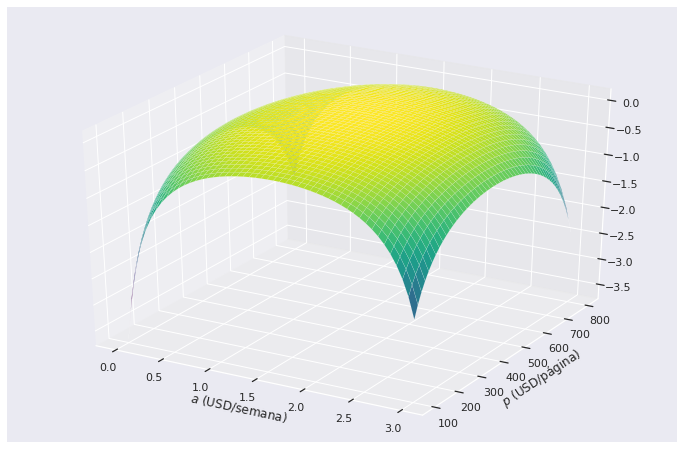

In [ ]:
plot3d(margem_lucro, (a, 0, 3), (p, 100, 800), xlabel='$a$ (USD/semana)', ylabel='$p$ (USD/página)', zlabel='Lucro')

#### Passo 2 - Abordagem de modelagem

Problema de otimização multidimensional sem restrição cujo objetivo é maximizar a margem de lucro. A abordagem de resolução se dará pelo Método de Busca Aleatória.

#### Passo 3 - Formulação do modelo

$$
\begin{align}
\text{max} ~~& f(a, p) \\
\text{sujeito a} ~~& a, p \in \Omega \\
\end{align}
$$

Sendo:
* $f(a, p)$: Função objetivo
* $\Omega$: Espaço viável das variáveis do problema.

Dado que não é aplicado qualquer restrição, temos:

$$
\begin{align}
\text{max} ~~& f(a, p) \\
\end{align}
$$

#### Passo 4 - Resolução do modelo

Função a ser otimizada:

In [ ]:
f = margem_lucro
Math(f"f(a, p)={latex(f)}")

<IPython.core.display.Math object>

O método a ser aplicado corresponde ao Método de Busca Aleatória. Realizaremos 30 iterações

In [ ]:
from random import uniform

def MetodoBuscaAleatoria(variaveis, limites, funcao, numero_iteracoes=10):
    num_variaveis = len(variaveis)
    x_ = np.zeros((num_variaveis, numero_iteracoes))

    f = lambdify(variaveis, funcao, 'numpy')
    f_max = 0
    variaveis_max = np.zeros([1, num_variaveis])

    for k in range(numero_iteracoes):
        x_k = x_[:, [k]]
        
        # Obter valor aleatório para cada variável
        for i, variavel in enumerate(variaveis):
            x_k[i][0] = uniform(*limites[variavel])
        
        if f_max < f(*x_k):
            f_max = f(*x_k)
            variaveis_max = x_k

        x_[:, k] = x_k.T

    retorno = {f'{variavel}': x_[i] for i, variavel in enumerate(variaveis)}
    retorno[f'f{Tuple(*variaveis)}'] = [f(*x_i) for x_i in x_.T]

    return pd.DataFrame(retorno), f_max[0], tuple(*variaveis_max.T)

Ao aplicá-lo no problema, temos

In [ ]:
resultado_busca_aleatoria_a = MetodoBuscaAleatoria(
    variaveis=(a, p),
    limites={
        a: [0, 2],
        p: [100, 800]
    },
    funcao=f,
    numero_iteracoes=30
)
 
tabela_a, f_max_a, variaveis_max_a = resultado_busca_aleatoria_a
s_a = {
    a: variaveis_max_a[0],
    p: variaveis_max_a[1]
}
 
print("Melhor f encontrado")
display(Math(f"""
f(a={s_a[a]}, p={s_a[p]}) = {f_max_a}
"""))
 
print("Iterações: ")
tabela_a

Melhor f encontrado


<IPython.core.display.Math object>

Iterações: 


,a,p,"f(a, p)"
0,0.589782,712.692377,-0.283212
1,0.471093,625.934613,-0.237824
2,0.748196,586.234394,-0.041175
3,0.290074,146.805397,-0.999794
4,1.429695,496.096404,0.124623
5,1.634090,203.259514,-0.018194
6,0.105478,456.030977,-0.559965
7,0.023765,409.034314,-0.750480
8,0.028832,397.780794,-0.751069
9,1.545693,338.894040,0.100315


#### Passo 5 - Resposta da pergunta

Sem mudança alguma, a receita da empresa corresponde a 
\begin{align*}
  \text{Receita } &= 80,000~\frac{\text{assinaturas}}{\text{semana}} \cdot \frac{\text{USD } 1.50}{\text{assinatura}} + 350~\frac{\text{propagandas}}{\text{semana}} \cdot \frac{\text{USD } 250.00}{\frac{\text{propagandas}}{\text{semana}}} \\
  &= \frac{\text{USD}~207,500.00}{\text{semana}}.
\end{align*}
Logo, a margem de lucro corresponde a
\begin{align*}
  \text{Margem de Lucro} &= 1 - \frac{\text{Despesas}}{\text{Receita}} \\
  &= 1 - \frac{\text{USD}~200,000.00}{\text{USD}~207,500.00} \\
  &= 0.0361445783 = 3.61445783 \%.
\end{align*}

Considerando que qualquer mudança na quantidade de unidades impressas ou na quantidade de propaganda não impacta o custo de produção, então o cenário de maior lucro, encontrado pelo Método de Busca Aleatória, se dará com



In [ ]:
a_aumentou = s_a[a] - a_original > 0
p_aumentou = s_a[p] - p_original > 0

Math(f"""
\\begin{{aligned}}
a &= \\text{{USD }}{s_a[a]}, \\\\
  & \\text{{ {"um aumento de" if a_aumentou else "uma redução de"} }} \\text{{USD }} {abs(s_a[a] - a_original)}  \\text{{ comparado com o valor original}} \\\\
  & ({(s_a[a]/a_original - 1) * 100}\%) \\\\
p &= \\text{{USD }}{s_a[p]}, \\\\
  & \\text{{ {"um aumento de" if p_aumentou else "uma redução de"} }} \\text{{USD }} {abs(s_a[p] - p_original)}  \\text{{ comparado com o valor original}} \\\\
  & ({(s_a[p]/p_original - 1) * 100}\%).
\\end{{aligned}}
""")

<IPython.core.display.Math object>

In [ ]:
Math(f"""
\\text{{O número de assinantes passará de }} {n_a.subs({a: a_original, p: p_original})} \\text{{ para }} {n_a.subs(s_a)}. \\\\
\\text{{O número de páginas de publicidade passará de }} {n_p.subs({a: a_original, p: p_original})} \\text{{ para }} {n_p.subs(s_a)}.
""")

<IPython.core.display.Math object>

In [ ]:
Math(f"""
\\text{{Estas mudanças resultariam em um lucro semanal de USD }} {L.subs({a: a_original, p: p_original})} \\text{{ para USD }} {L.subs(s_a)}. \\\\
\\text{{E a margem de lucro passa de }} {margem_lucro.subs({a: a_original, p: p_original}) * 100} \% \\text{{ para }} {margem_lucro.subs(s_a) * 100} \%.
""")

<IPython.core.display.Math object>

### b) Let $z=f(x; y)$ denote the objective function you obtained in part (a). Use a computer algebra system to determine $F=\partial f/\partial x$ and $G=\partial f/\partial y$. Then determine $\partial F/\partial x, \partial F/\partial y, \partial G/ x$ and $\partial G/ \partial y$.

Façamos
\begin{aligned}
x &= a \\
y &= p
\end{aligned}

O vetor gradiente de $z$ (ou $f(a, p)$)
$$\nabla f(a, p) = 
\left[
\begin{matrix}
    \frac{\partial f(a, p)}{\partial a} \\
    \frac{\partial f(a, p)}{\partial p}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    F \\
    G
\end{matrix}
\right]
=
\left[
\begin{matrix}
    \frac{\partial f}{\partial x} \\
    \frac{\partial f}{\partial y}
\end{matrix}
\right]
$$
corresponde a

In [ ]:
grad_f = Matrix(derive_by_array(f, (a, p)))

display(Math(f"\\nabla f(a, p) = {latex(grad_f)}"))

<IPython.core.display.Math object>

Sua hessiana $$H = \nabla^2 z = \nabla^2 f(a, p) = 
\left[
\begin{matrix}
    \frac{\partial^2 f(a, p)}{\partial s^2} & \frac{\partial^2 f(a, p)}{\partial s \partial t} \\
    \frac{\partial^2 f(a, p)}{\partial t \partial s} & \frac{\partial^2 f(a, p)}{\partial t^2}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    \frac{\partial F}{\partial x} & \frac{\partial F}{\partial y} \\
    \frac{\partial G}{\partial x} & \frac{\partial G}{\partial y}
\end{matrix}
\right]
$$
como

In [ ]:
hessian_f = hessian(f, [a, p])

Math(f"H = \\nabla^2 f(a, p) = {latex(hessian_f)}")

<IPython.core.display.Math object>

### c) Use Newton’s method in two variables to obtain a precise answer to the question in part (a). Use the approximate solution from part (a) as your initial estimate. The required derivatives were calculated in part (b).


Além do que foi calculado no item **b**, é necessário a inversa da matriz hessiana, dado por:

In [ ]:
Math(f"H^{{-1}} = \\nabla^2 f(a, p) = {latex(hessian_f.inv())}")

<IPython.core.display.Math object>

Aplicando o método de Newton, temos:

In [ ]:
def MetodoNewton(variaveis, valores_iniciais, funcao, numero_iteracoes=10):
    num_variaveis = len(variaveis)
    x_ = np.zeros((num_variaveis, numero_iteracoes+1))
    
    x_[:, 0] = valores_iniciais

    f = lambdify(variaveis, funcao, 'numpy')

    gradiente = Matrix(derive_by_array(funcao, variaveis))
    gradiente_f_original = lambdify(variaveis, gradiente, 'numpy')
    gradiente_f = lambda vetor: gradiente_f_original(*vetor.T.flatten())

    hessiana = hessian(funcao, variaveis)

    hessiana_inversa_f_original = lambdify(variaveis, hessiana.inv(), 'numpy')
    hessiana_inversa_f = lambda vetor: hessiana_inversa_f_original(*vetor.T.flatten())
    
    for k in range(numero_iteracoes):
        x_k = x_[:, [k]]

        x_k_next = x_k - hessiana_inversa_f(x_k) @ gradiente_f(x_k)
        x_[:, k+1] = x_k_next.T
    
    retorno = {f'{variavel}': x_[i] for i, variavel in enumerate(variaveis)}
    retorno[f'f{Tuple(*variaveis)}'] = [f(*x_i) for x_i in x_.T]
    
    return pd.DataFrame(retorno)

resultado_newton_a = MetodoNewton(
    variaveis=(a, p),
    valores_iniciais=(s_a[a], s_a[p]),
    funcao=f,
    numero_iteracoes=10
)

resultado_newton_a

,a,p,"f(a, p)"
0,1.429695,496.096404,0.124623
1,1.527120,460.408991,0.128888
2,1.529029,459.709715,0.128890
3,1.529029,459.709710,0.128890
4,1.529029,459.709710,0.128890
5,1.529029,459.709710,0.128890
6,1.529029,459.709710,0.128890
7,1.529029,459.709710,0.128890
8,1.529029,459.709710,0.128890
9,1.529029,459.709710,0.128890


Respondendo novamente a pergunta, agora com os novos valores calculados, temos que, considerando que qualquer mudança na quantidade de unidades impressas ou na quantidade de propaganda não impacta o custo de produção, o cenário de maior lucro, encontrado pelo método de Newton, se dará com

In [ ]:
s_c = {
    a: resultado_newton_a.iloc[-1]['a'],
    p: resultado_newton_a.iloc[-1]['p']
}
s_c 

a_aumentou = s_c[a] - a_original > 0
p_aumentou = s_c[p] - p_original > 0

Math(f"""
\\begin{{aligned}}
a &= \\text{{USD }}{s_c[a]}, \\\\
  & \\text{{ {"um aumento de" if a_aumentou else "uma redução de"} }} \\text{{USD }} {abs(s_c[a] - a_original)}  \\text{{ comparado com o valor original}} \\\\
  & ({(s_c[a]/a_original - 1) * 100}\%) \\\\
p &= \\text{{USD }}{s_c[p]}, \\\\
  & \\text{{ {"um aumento de" if p_aumentou else "uma redução de"} }} \\text{{USD }} {abs(s_c[p] - p_original)}  \\text{{ comparado com o valor original}} \\\\
  & ({(s_c[p]/p_original - 1) * 100}\%).
\\end{{aligned}}
""")

<IPython.core.display.Math object>

In [ ]:
Math(f"""
\\text{{O número de assinantes passará de }} {n_a.subs({a: a_original, p: p_original})} \\text{{ para }} {n_a.subs(s_c)}. \\\\
\\text{{O número de páginas de publicidade passará de }} {n_p.subs({a: a_original, p: p_original})} \\text{{ para }} {n_p.subs(s_c)}.
""")

<IPython.core.display.Math object>

In [ ]:
Math(f"""
\\text{{Estas mudanças resultariam em um lucro semanal de USD }} {L.subs({a: a_original, p: p_original})} \\text{{ para USD }} {L.subs(s_c)}. \\\\
\\text{{E a margem de lucro passa de }} {margem_lucro.subs({a: a_original, p: p_original}) * 100} \% \\text{{ para }} {margem_lucro.subs(s_c) * 100} \%.
""")

<IPython.core.display.Math object>

### d) If you have not previously solved part (a) of Exercise 7 in Chapter 2, then do so now. Use any method. Compare to the results of part (c). Does it matter whether we choose to maximize profit or profit margin? Explain.

Não, pois os valores de $a$, $p$ e lucro encontrados no item a) da questão 7 do capítulo 2 na resolução da lista 1 do Samuel foram $a=1.53$,  $p = 459.71$ e lucro $= 29{,}592.05$ (com custo fixo da produção dos jornais) se comparados com os valores de $a = 1.529029$, $p = 459.709710$ e lucro $= 29{,}592.09$ (com custo fixo da produção dos jornais) encontrados no item c) desta questão, podemos observar que o erro relativo para cada variável é muito próximo de zero. 
 
* $r_a = \frac{459.71 - 459.709710}{459.71} = 6.31\cdot10^{-7}$
* $r_p = \frac{1.53 - 1.529029}{1.53} = 6.35\cdot10^{-4}$
 
Já os lucros são quase iguais. Logo, tanto faz maximizar o lucro como a margem do lucro.